In [6]:
from logicqubit.logic import *
from cmath import *
import numpy as np
import sympy as sp
from scipy.optimize import *
import matplotlib.pyplot as plt

In [7]:
def qft(qr):
    for i in range(len(qr)):
        for j in range(i):
            qr[i].CU1(qr[j], pi/float(2**(i-j)))
        qr[i].H()
        
def iqft(qr): # transformada quântica de Fourier inversa
    for i in range(len(qr)):
        for j in range(i):
            qr[i].CU1(qr[j], -pi/float(2**(i-j)))
        qr[i].H()
        
def swap(s1, s2):
    s2.CX(s1)
    s1.CX(s2)
    s2.CX(s1)
    
def ansatz(q, theta):
    return q.RY(theta)

In [8]:
def expectation(theta):
    # H = Sz
    # <psi|H|psi> = <psi| [[1,0],[0,-1]] |psi>
    # |0><0|=[[1,0],[0,0]] e |1><1|=[[0,0],[0,1]]
    # <psi|H|psi> = <psi|0><0|psi> - <psi|1><1|psi> = <0> - <1>
    
    logicQuBit  = LogicQuBit(1)
    q = Qubit()
    
    ansatz(q, theta)

    res = logicQuBit.Measure([q])
    return res[0]-res[1]

In [9]:
expectation(0)

1.0

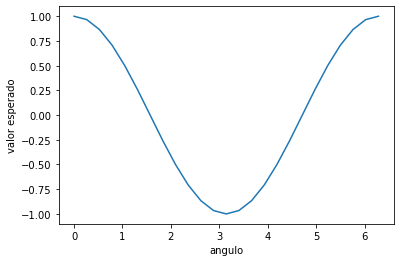

In [12]:
params = np.linspace(0.0, 2 * np.pi, 25)
data = [expectation(theta) for theta in params]
 
plt.xlabel('angulo')
plt.ylabel('valor esperado')
plt.plot(params, data)
plt.show()

In [11]:
theta = 0.0
minimum = minimize(expectation, theta, method='Nelder-Mead', options={'initial_simplex': np.array([[0.0], [0.05]]), 'xatol': 1.0e-2})
print(minimum)

 final_simplex: (array([[3.14375],
       [3.1375 ]]), array([-0.99999767, -0.99999163]))
           fun: -0.9999976729291358
       message: 'Optimization terminated successfully.'
          nfev: 28
           nit: 14
        status: 0
       success: True
             x: array([3.14375])
